in this notebook i want to compile all of our labeled data into a bil 'ol df for ML

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Create a custom function for data transformation
features = ['datetime',
         'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque'
]

def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)

C:\Users\twolf\AppData\Local\Temp\ipykernel_18052\304158065.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_18052\304158065.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_18052\304158065.py:20: SettingWithCopyWarning: 


In [4]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3]).reset_index()


In [5]:
# highlight cells and: ctrl,+,/ to comment and uncomment 
# #Add columns for surface and hover taxi maneuvers and default set value to zero
# df['Surface_Taxi'] = 0
# df['Hover_Taxi'] = 0
# df['Quick_Stop'] = 0

In [6]:

# #label data points from 9/19 set 
# df.loc[(df['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['Hover_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 1
# df.loc[(df['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['Hover_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 1

# #label data points from 9/20 set
# df.loc[(df['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['Hover_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['Hover_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['Hover_Taxi']] = 1
# df.loc[(df['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['Hover_Taxi']] = 1


In [7]:
#just make maneuver col

df['maneuver'] = 0

#label data points from 9/19 set 
df.loc[(df['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-19 22:00:35' , '2022-09-19 22:01:44' , inclusive='both')),['maneuver']] = 'quick'
df.loc[(df['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['maneuver']] = 'quick'

#label data points from 9/20 set
df.loc[(df['datetime'].between('2022-09-20 20:25:50' , '2022-09-20 20:27:54' , inclusive='both')),['maneuver']] = 'surface'
df.loc[(df['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['maneuver']] = 'hover'
df.loc[(df['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['maneuver']] = 'hover'


In [8]:

df.drop(df[df['maneuver']==0].index, inplace=True)


In [9]:
#get dummies , turns catetgorical values into 3 new rows with 0s and 1s
dummies = pd.get_dummies(df['maneuver'])


In [10]:
df.drop(['index', 'datetime'], axis=1)

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,maneuver
223,1.000000,0.290000,113.827175,0.658775,3.876150,-0.283800,-37.349850,-4.746850,34.020775,-0.331850,44.952450,35.113250,35.113250,surface
224,1.000000,0.469429,113.765086,1.815429,7.047200,-0.186971,-44.221371,-2.720200,34.114886,-0.028457,46.346171,39.858829,39.858829,surface
225,1.000000,0.494865,113.580027,3.182162,5.442784,-0.185595,-43.949514,-2.258081,33.822676,0.581703,44.717378,37.255216,37.255216,surface
226,1.000000,0.395128,113.414872,4.566308,-5.165410,-0.130692,-44.382846,-2.766103,34.101051,4.291051,43.760026,34.740718,34.740718,surface
227,1.000000,0.443846,114.143000,5.930205,-0.810744,0.231821,-42.757154,-2.328923,33.948026,7.572462,43.522821,34.127026,34.127026,surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,0.000000,7.565918,1.265898,5.295592,-215.433408,0.021347,-5.731184,-3.308449,41.096388,-3.571714,50.755918,49.334041,49.334041,quick
5107,0.000000,2.717959,0.612592,5.023837,-277.226347,-0.165429,-6.531163,-1.864061,41.074000,-3.659020,50.862755,49.174429,49.174429,quick
5108,0.000000,0.798000,0.429860,4.081580,-185.779100,-0.190300,-0.450240,0.147020,39.903100,-5.294860,50.946780,49.939620,49.939620,quick
5109,0.000000,0.540000,0.531735,2.055857,-60.091286,-0.217143,11.727367,7.722388,32.061184,-9.789469,47.615306,44.686735,44.686735,quick


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [30]:
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

X = df[model_features]
y = df['maneuver']

In [17]:
dummies

,hover,quick,surface
223,0,0,1
224,0,0,1
225,0,0,1
226,0,0,1
227,0,0,1
...,...,...,...
5106,0,1,0
5107,0,1,0
5108,0,1,0
5109,0,1,0


In [18]:
len(X)

1231

In [19]:
len(y)

1231

In [31]:
#Modeling SVM  wants a 1-d array for y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Save scaler transformation to file
# scaler_filename = 'D:/git/rotorcraft-project/david/scaler_trained_model.pkl'
# scaler_filename = 'C:/Users/david/git-repo/rotorcraft-project/david/scaler_trained_model.pkl'
# pickle.dump(scaler, open(scaler_filename, 'wb'))

X_test = scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.98


In [32]:
#Decision tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1121218)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

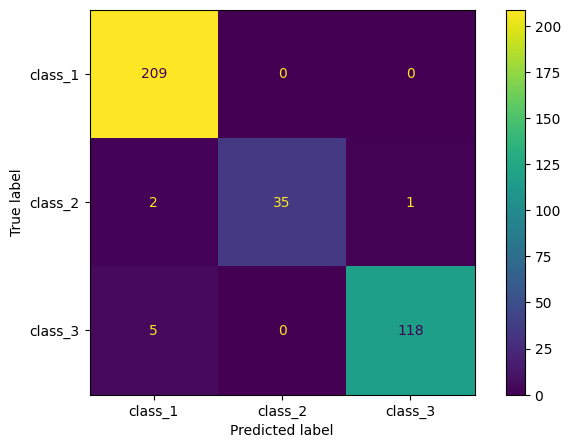

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=["class_1", "class_2", "class_3"],)
cmp.plot(ax=ax)
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.9105691056910569
0.9243243243243243


C:\Users\twolf\anaconda3\envs\valkyrie\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

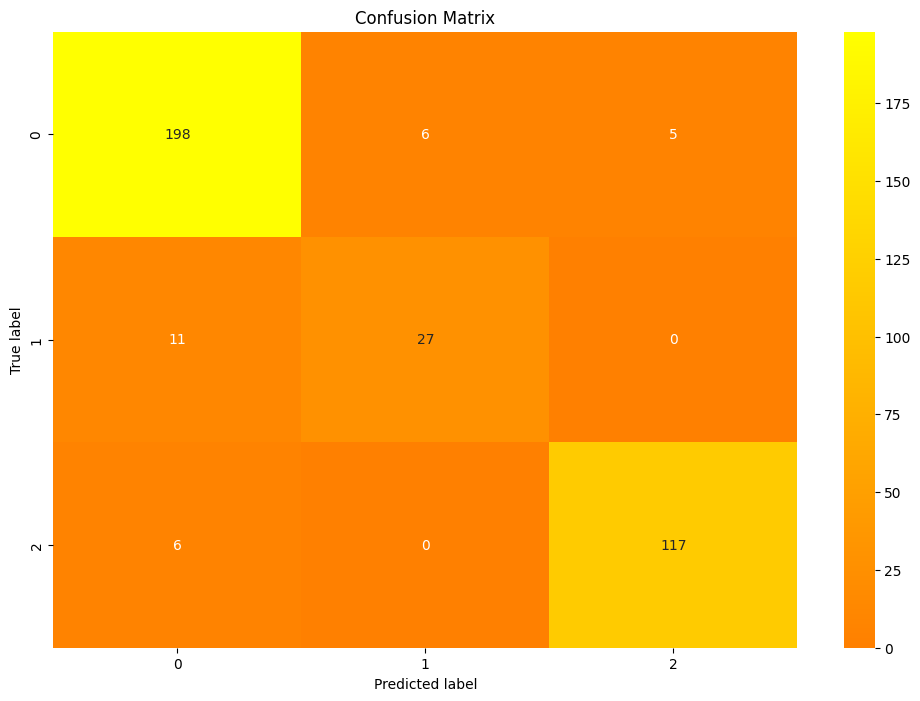

In [37]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       hover       0.97      1.00      0.98       209
       quick       1.00      0.92      0.96        38
     surface       0.99      0.96      0.98       123

    accuracy                           0.98       370
   macro avg       0.99      0.96      0.97       370
weighted avg       0.98      0.98      0.98       370



In [38]:
df['maneuver'].value_counts()

hover      663
surface    411
quick      157
Name: maneuver, dtype: int64